 ## About this dataset ##

age: Age of the patient (between 29 and 77)

sex: Sex of the patient (0 or 1)

cp: Chest Pain type chest pain type

Value 1: typical angina

Value 2: atypical angina

Value 3: non-anginal pain

Value 4: asymptomatic

trtbps: resting blood pressure (in mm Hg)

chol: cholestoral in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg: resting electrocardiographic results

Value 0: normal

Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh : maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: Previous peak

slp (slope): the slope of the peak exercise ST segment (2 = upsloping: 1 = flat; 0 = downsloping)

ca: number of major vessels (0-3)

thal: 2 = normal; 1 = fixed defect; 3 = reversable defect

output: (target) : 0= less chance of heart attack 1= more chance of heart attack

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [59]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [60]:
df.shape

(303, 14)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [62]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [63]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [64]:
df.head(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  output  
0    0      1       1  
1    0      2       1

In [65]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

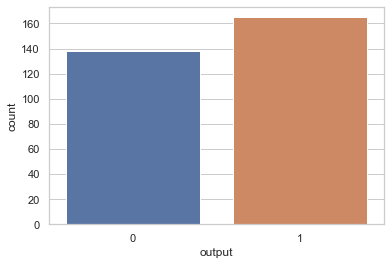

In [66]:
sns.countplot(data = df, x = 'output')

<AxesSubplot:xlabel='output', ylabel='age'>

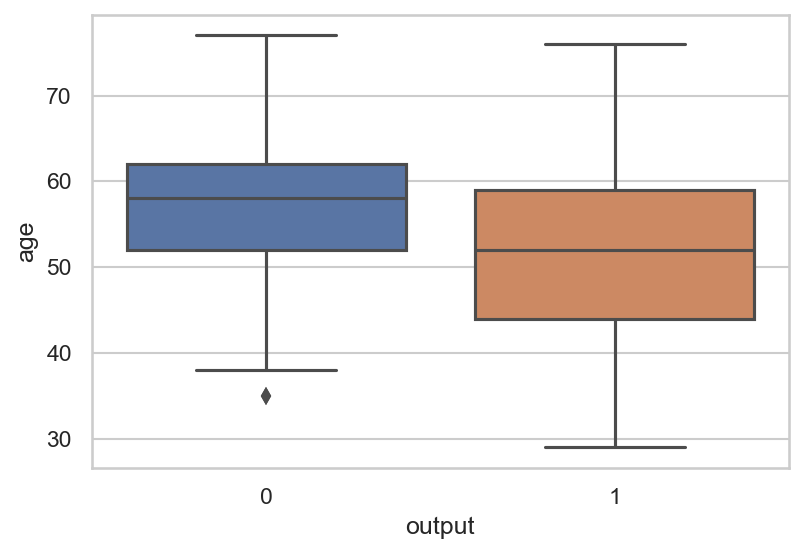

In [67]:
plt.figure(dpi = 150)
sns.boxplot(x = 'output', y = 'age', data = df)

<AxesSubplot:xlabel='output', ylabel='trtbps'>

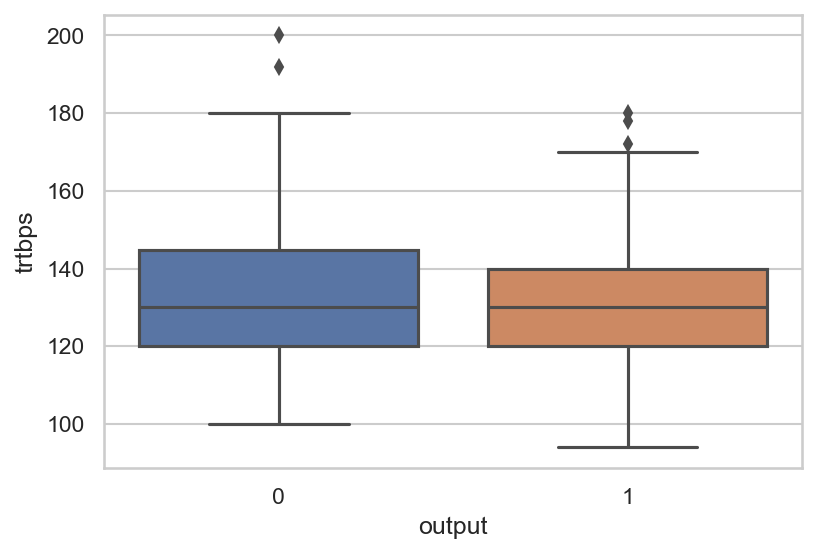

In [68]:
plt.figure(dpi = 150)
sns.boxplot(x = 'output', y = 'trtbps', data = df)

<Figure size 900x600 with 0 Axes>

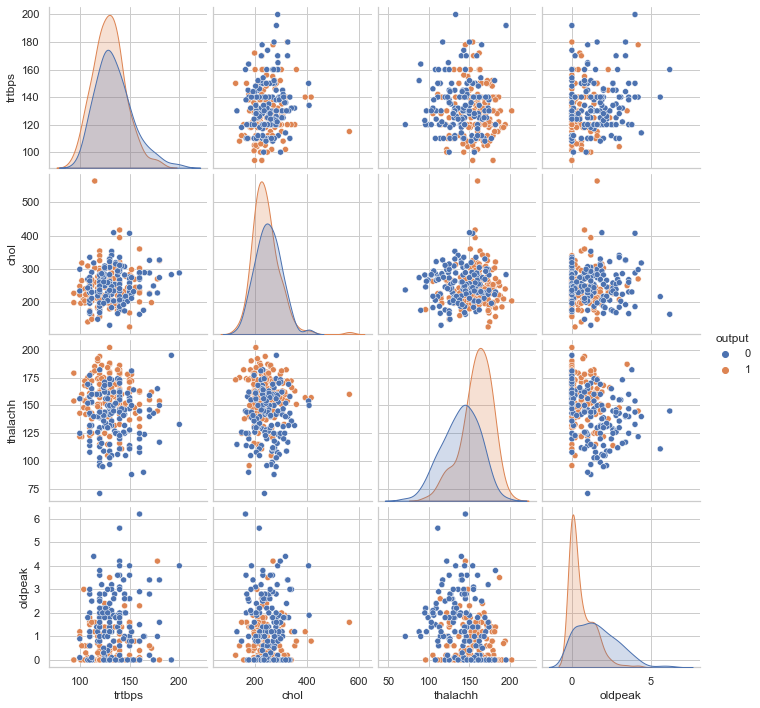

In [69]:
plt.figure(dpi = 150)
sns.pairplot(df[['trtbps', 'chol', 'thalachh', 'oldpeak', 'output' ]], hue='output');

<AxesSubplot:>

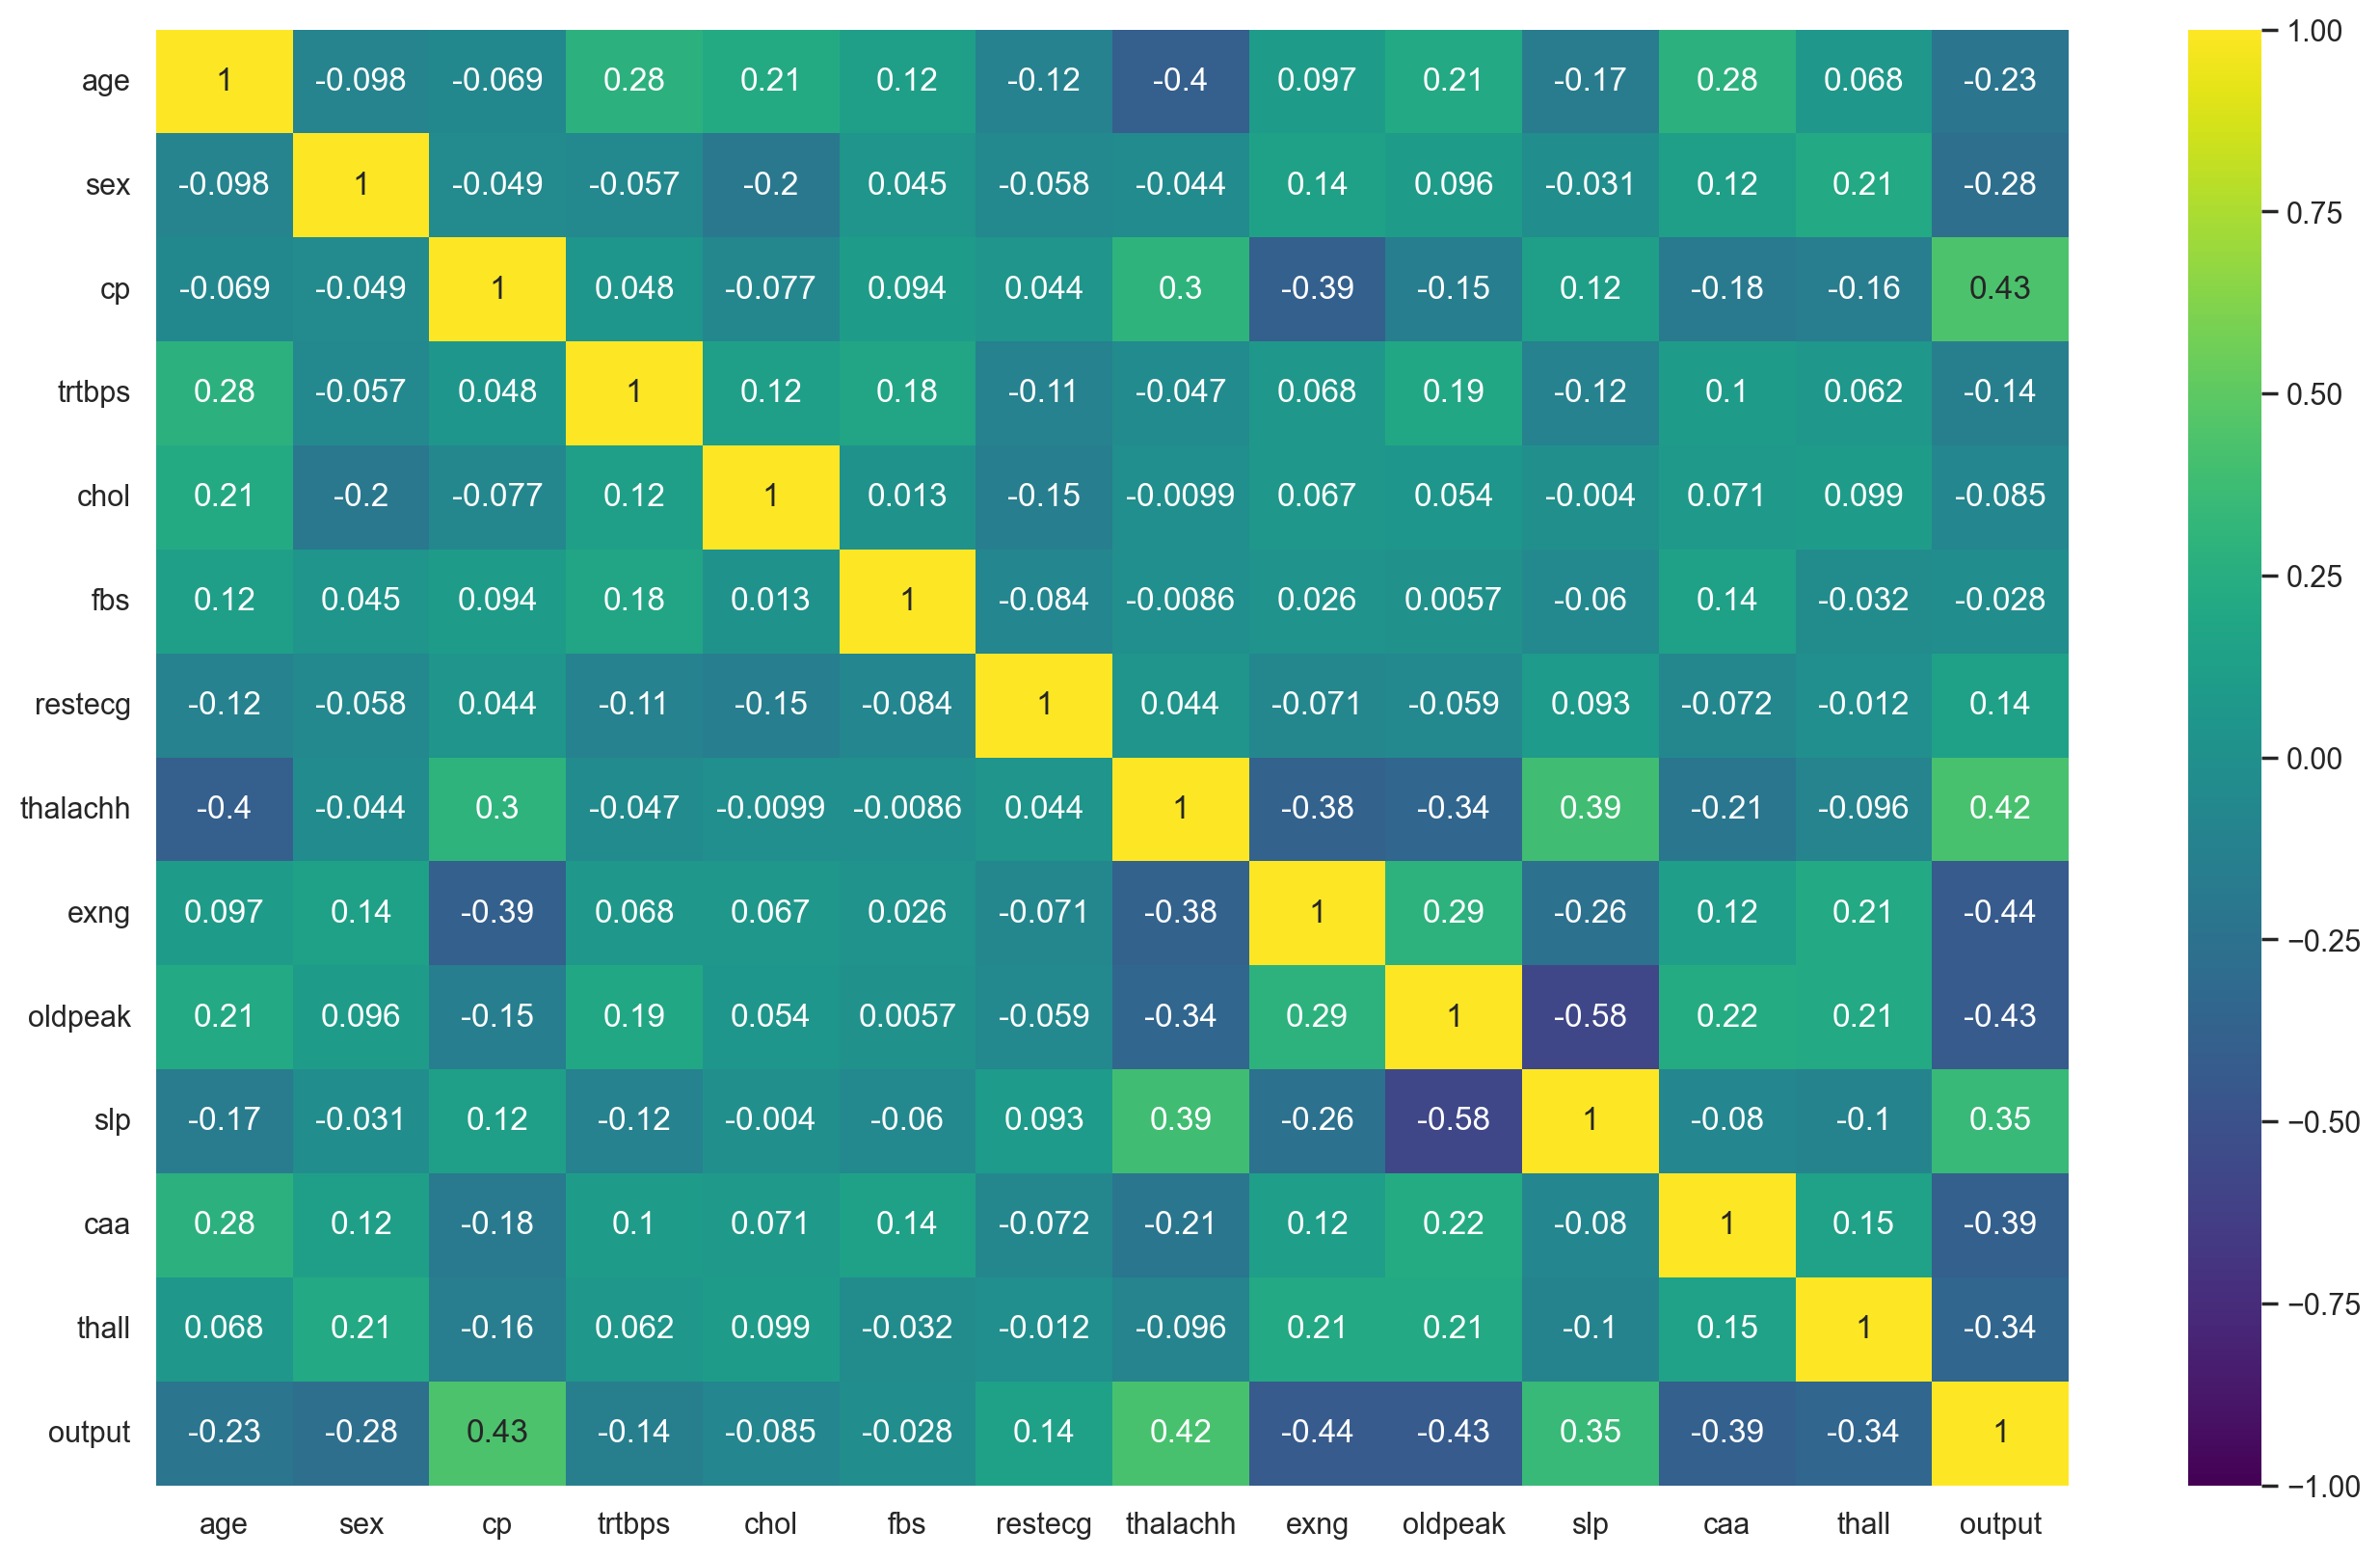

In [70]:
plt.figure(figsize = (16, 10), dpi = 200)
sns.heatmap(df.corr(), annot = True, center = 0, vmin = -1, vmax = 1, cmap = 'viridis')

<AxesSubplot:xlabel='oldpeak', ylabel='output'>

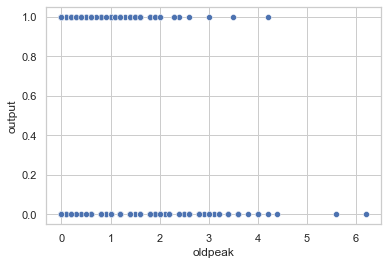

In [71]:
sns.scatterplot(x = 'oldpeak', y = 'output', data = df)

In [72]:
X = df.drop('output', axis = 1)

In [73]:
y = df['output']

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [77]:
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)

In [79]:
X_test = scaler.transform(X_test)

In [80]:
from sklearn.linear_model import LogisticRegressionCV

In [81]:
# help(LogisticRegression)

In [82]:
log_model = LogisticRegressionCV()

In [83]:
log_model.fit(X_train, y_train)

LogisticRegressionCV()

In [84]:
log_model.C_

array([0.04641589])

In [85]:
log_model.coef_[0]

array([-0.10531209, -0.32718169,  0.5259419 , -0.16316938, -0.11556908,
        0.03835044,  0.11169563,  0.28535151, -0.34940429, -0.32459146,
        0.26735195, -0.46241961, -0.34386965])

In [86]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [87]:
coefs = pd.Series(index = X.columns, data = log_model.coef_[0])

In [88]:
coefs

age        -0.105312
sex        -0.327182
cp          0.525942
trtbps     -0.163169
chol       -0.115569
fbs         0.038350
restecg     0.111696
thalachh    0.285352
exng       -0.349404
oldpeak    -0.324591
slp         0.267352
caa        -0.462420
thall      -0.343870
dtype: float64

<AxesSubplot:>

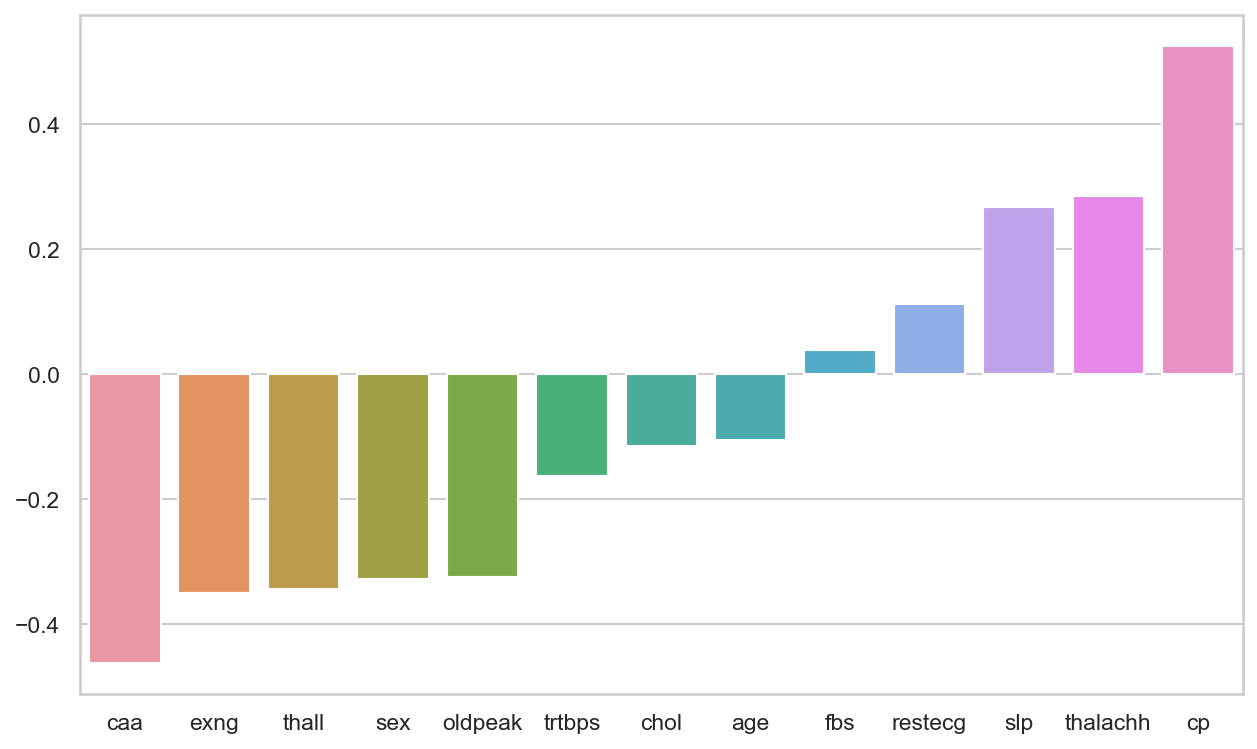

In [89]:
coefs = coefs.sort_values()
plt.figure(figsize = (10, 6), dpi = 150)
sns.barplot(x = coefs.index, y = coefs.values)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
y_pred = log_model.predict(X_test)

In [92]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [93]:
accuracy_score(y_test, y_pred)

0.819672131147541

In [94]:
confusion_matrix(y_test, y_pred)

array([[22,  9],
       [ 2, 28]], dtype=int64)

In [95]:
from sklearn.metrics import plot_confusion_matrix

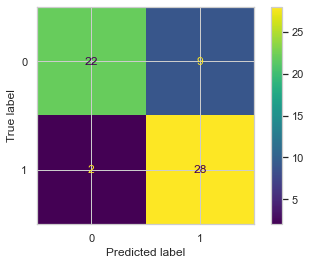

In [96]:
plot_confusion_matrix(log_model, X_test, y_test)

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80        31
           1       0.76      0.93      0.84        30

    accuracy                           0.82        61
   macro avg       0.84      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



In [98]:
from sklearn.metrics import precision_score,recall_score

In [99]:
precision_score(y_test, y_pred)

0.7567567567567568

In [100]:
recall_score(y_test, y_pred)

0.9333333333333333

In [101]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

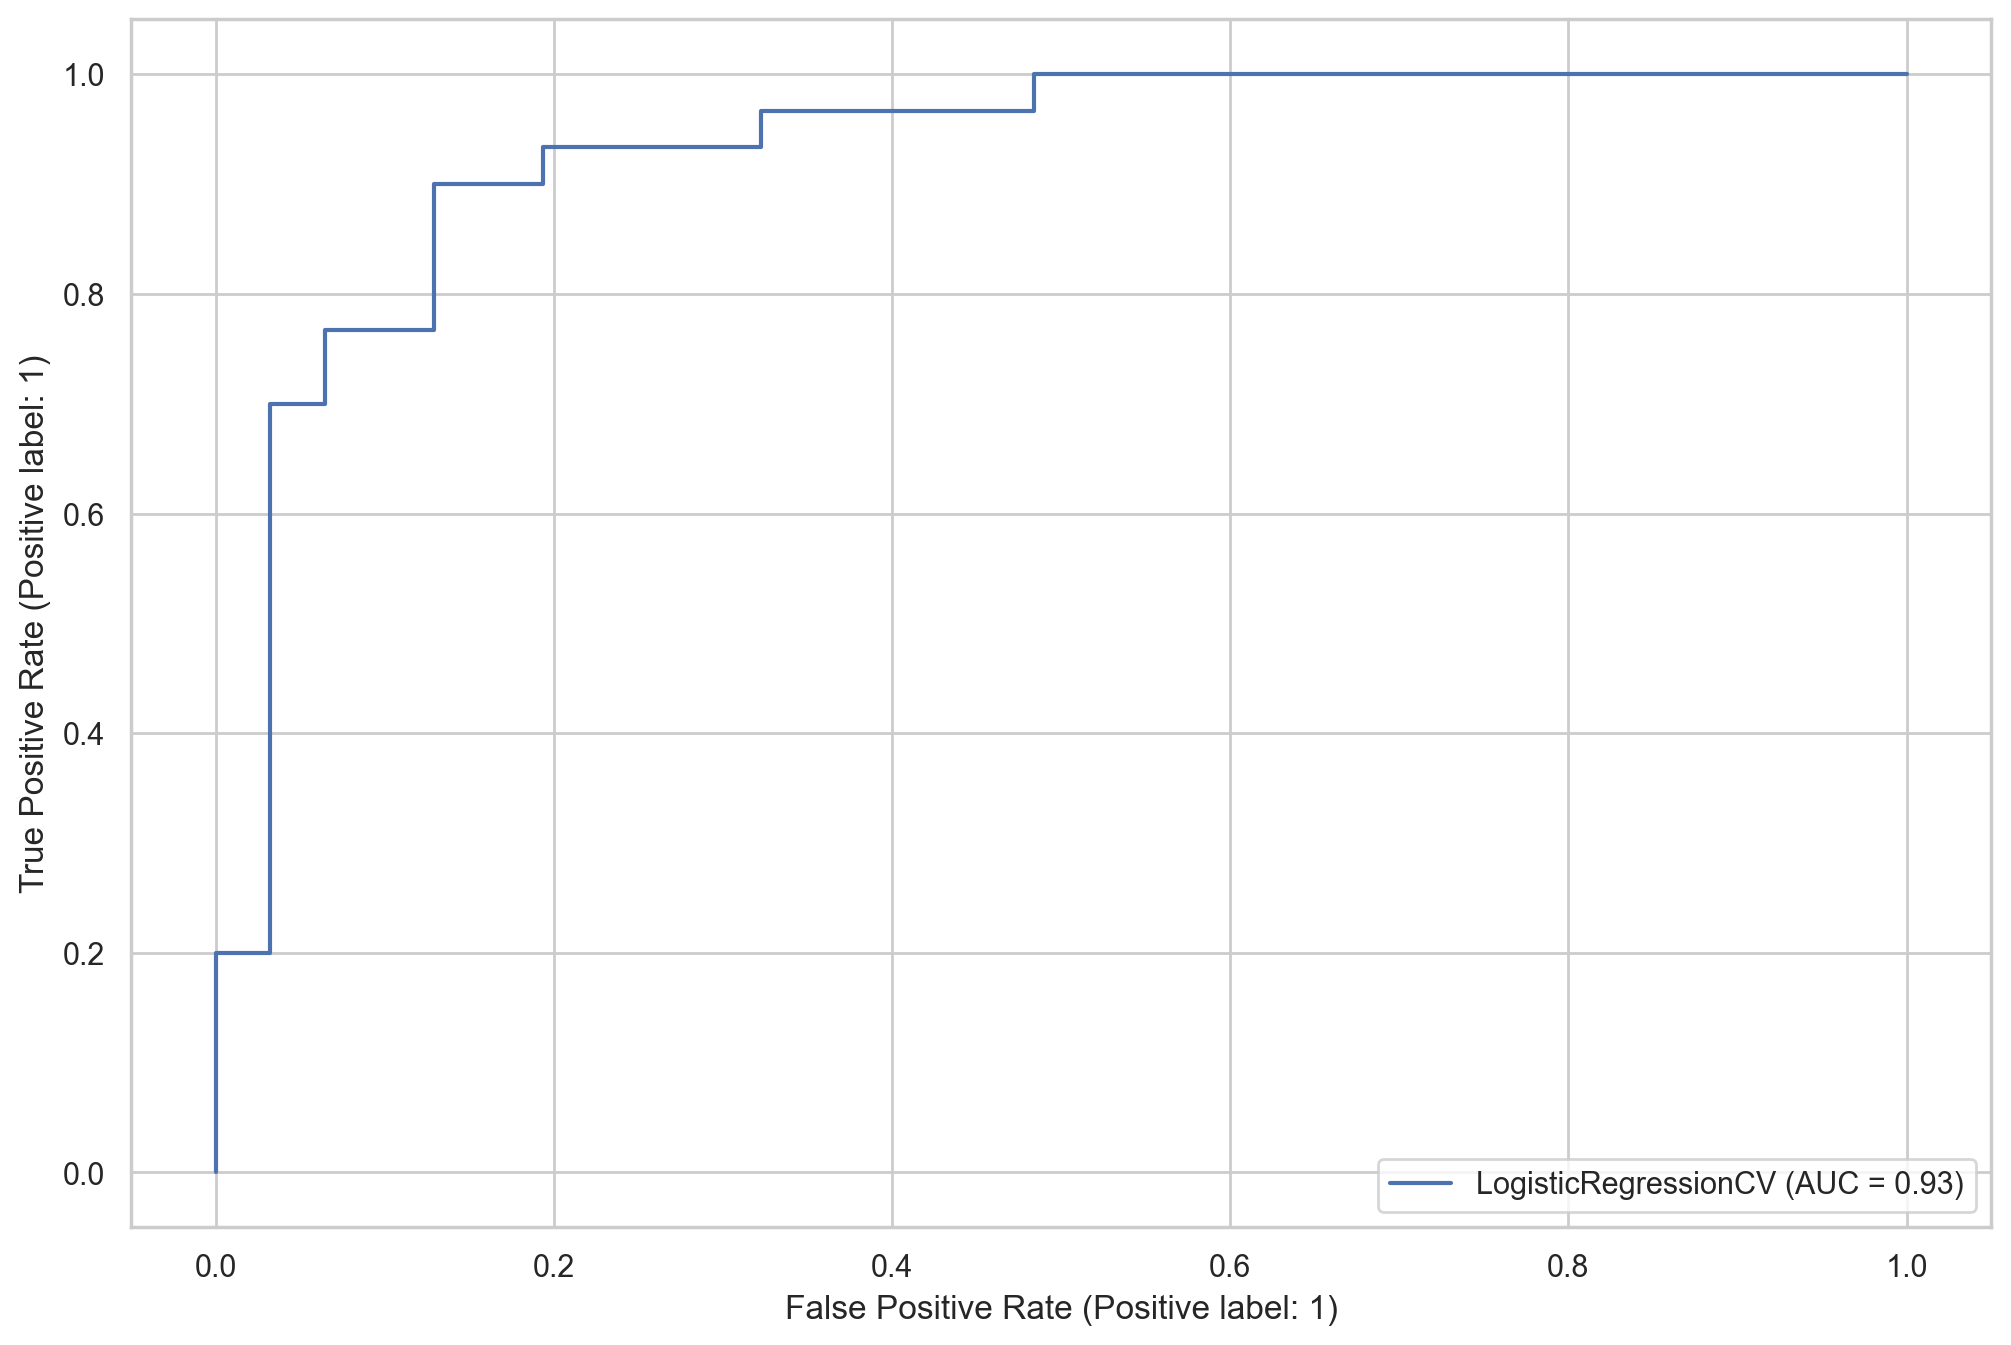

In [102]:
fig, ax = plt.subplots(figsize = (12, 8), dpi = 200)
plot_roc_curve(log_model, X_test, y_test, ax = ax)

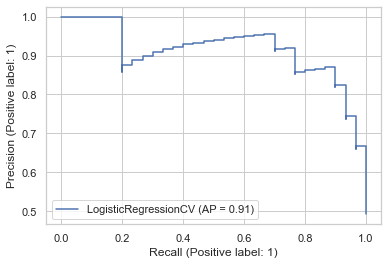

In [103]:
plot_precision_recall_curve(log_model, X_test, y_test)

In [104]:
patient = [[54, 1, 0, 12, 286, 0, 0, 116, 1, 3.2, 1, 2, 2]]

In [105]:
log_model.predict(patient)

array([0], dtype=int64)

In [106]:
log_model.predict_proba(patient)

array([[9.99969518e-01, 3.04818948e-05]])